In [1]:
# Image segmentation using Opencv
#Detecting disease part from the rice leaf

In [2]:
from PIL import Image, ImageEnhance,ImageFilter
import cv2 as cv
import numpy as np
import os
import pandas as pd
import random as rng
import matplotlib.pyplot as plt



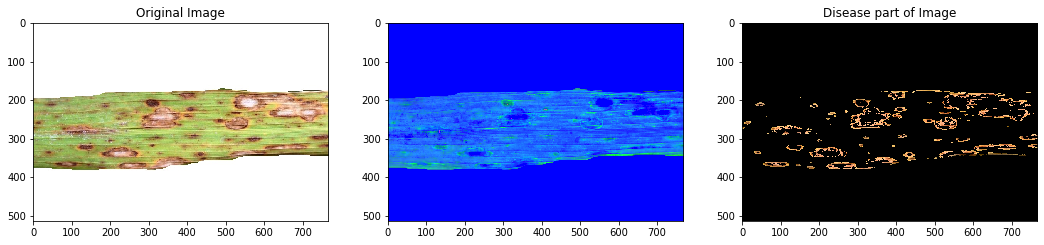

In [44]:
orig_im = cv.imread('rice_leaf_diseases/Brown spot/DSC_0113.JPG')

new_image = np.zeros(orig_im.shape, orig_im.dtype)
alpha = 1.5 # Simple contrast control
beta = 0.5    # Simple brightness control
new_image = cv.convertScaleAbs(orig_im, alpha=alpha, beta=beta)


orig_im_rgb=cv.cvtColor(orig_im,cv.COLOR_BGR2RGB)
gray_im=cv.cvtColor(orig_im,cv.COLOR_BGR2GRAY)
lab_im=cv.cvtColor(orig_im,cv.COLOR_BGR2Lab)
hsv_im=cv.cvtColor(new_image,cv.COLOR_BGR2HSV)


# define range of green color in HSV
lower_green = np.array([10,50,50])
upper_green = np.array([60,255,255])

  # Threshold the HSV image to get only green colors
mask = cv.inRange(hsv_im, lower_green, upper_green)
    # Bitwise-AND mask and original image
res = cv.bitwise_and(hsv_im,hsv_im, mask= mask)

# define range of red color in HSV
lower_red = np.array([-20,100,50])
upper_red = np.array([20,255,255])

# Threshold the HSV image to get only red colors

mask2 = cv.inRange(res, lower_red, upper_red)

    # Bitwise-AND mask and original image
res2 = cv.bitwise_and(res,res,mask=mask2)

# converting HSV to RGB colorspace

rgb_res2=cv.cvtColor(res2,cv.COLOR_HSV2RGB)

plt.figure(figsize=(18,18))
plt.subplot(131), plt.imshow(orig_im_rgb), plt.title("Original Image")
plt.subplot(132),plt.imshow(hsv_im)
plt.subplot(133), plt.imshow(rgb_res2),plt.title("Disease part of Image")

plt.show()
